In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Reload CSVs to ensure scope
orders = pd.read_csv(r"C:\Users\hp\Documents\Data science Projects\Tech_Crush\pizza_sales\orders.csv")
details = pd.read_csv(r"C:\Users\hp\Documents\Data science Projects\Tech_Crush\pizza_sales\order_details.csv")
pizzas = pd.read_csv(r"C:\Users\hp\Documents\Data science Projects\Tech_Crush\pizza_sales\pizzas.csv")
pizza_types = pd.read_csv(r"C:\Users\hp\Documents\Data science Projects\Tech_Crush\pizza_sales\pizza_types.csv", encoding='latin1')

# Combine date & time into a single datetime
orders['datetime'] = pd.to_datetime(orders['date'] + ' ' + orders['time'])

# Merge datasets
df = (
    orders
    .merge(details, on="order_id", how="left")
    .merge(pizzas, on="pizza_id", how="left")
    .merge(pizza_types, on="pizza_type_id", how="left")
)

# Display merged DataFrame head
df.head()


,order_id,date,time,datetime,order_details_id,pizza_id,quantity,pizza_type_id,size,price,name,category,ingredients
0,1,2015-01-01,11:38:36,2015-01-01 11:38:36,1,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
1,2,2015-01-01,11:57:40,2015-01-01 11:57:40,2,classic_dlx_m,1,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,..."
2,2,2015-01-01,11:57:40,2015-01-01 11:57:40,3,five_cheese_l,1,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go..."
3,2,2015-01-01,11:57:40,2015-01-01 11:57:40,4,ital_supr_l,1,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni..."
4,2,2015-01-01,11:57:40,2015-01-01 11:57:40,5,mexicana_m,1,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O..."


In [3]:
# Step 3: Compute total revenue
df['sales'] = df['quantity'] * df['price']
total_revenue = df['sales'].sum()

print(f"Total revenue for the year: ${total_revenue:,.2f}")


Total revenue for the year: $817,860.05


In [5]:
#Total quantity sold
total_qty = df['quantity'].sum()
print(f"Total quantity sold: {total_qty}")


Total quantity sold: 49574


In [6]:
# Compute the total number of orders.

total_orders = orders['order_id'].nunique()
print(f"Total number of unique orders: {total_orders}")

Total number of unique orders: 21350


In [7]:
# Step 6: Compute number of pizza types offered
num_types = pizza_types['name'].nunique()
print(f"Number of pizza types offered: {num_types}")


Number of pizza types offered: 32


In [8]:
# Step 7: Compute average pizza unit price
avg_price = df['price'].mean()
print(f"Average pizza unit price: ${avg_price:.2f}")


Average pizza unit price: $16.49


In [9]:
# If not already present:
# df['hour'] = df['datetime'].dt.hour

sales_by_hour = df.groupby(df['datetime'].dt.hour)['sales'].sum()
peak_hour = sales_by_hour.idxmax()
peak_value = sales_by_hour.max()

print(f"Peak sales hour: {peak_hour}:00 with total sales of ${peak_value:,.2f}")


Peak sales hour: 12:00 with total sales of $111,877.90


Peak sales hour: 12:00 with total sales of $111,877.90


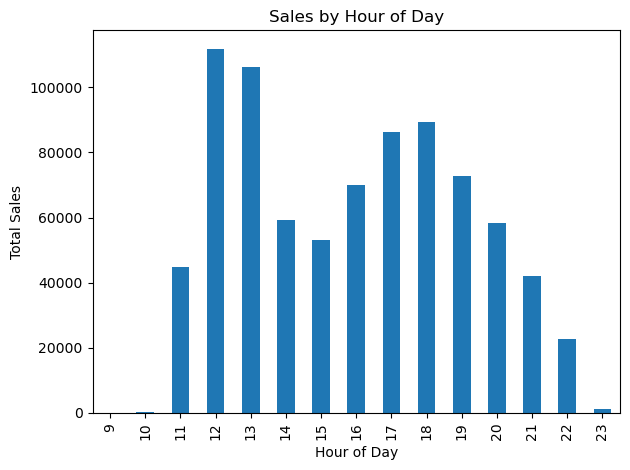

In [10]:


# Calculate sales by hour
sales_by_hour = df.groupby(df['datetime'].dt.hour)['sales'].sum()

# Determine peak hour
peak_hour = sales_by_hour.idxmax()
peak_value = sales_by_hour.max()

# Display the results
print(f"Peak sales hour: {peak_hour}:00 with total sales of ${peak_value:,.2f}")

# Plot sales by hour for visualization
plt.figure()
sales_by_hour.plot(kind="bar", title="Sales by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Total Sales")
plt.tight_layout()
plt.show()


datetime
Monday       107329.55
Tuesday      114133.80
Wednesday    114408.40
Thursday     123528.50
Friday       136073.90
Saturday     123182.40
Sunday        99203.50
Name: sales, dtype: float64

Busiest day: Friday with sales of $136,073.90


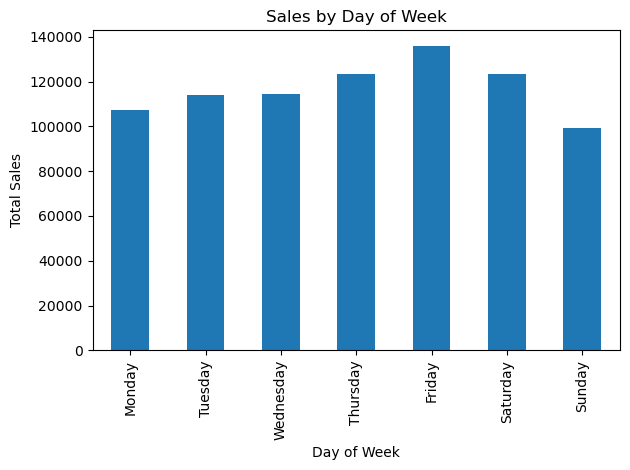

In [11]:


# Step 9: Sales by day of week
sales_by_weekday = df.groupby(df['datetime'].dt.day_name())['sales'].sum()
order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
sales_by_weekday = sales_by_weekday.reindex(order)

# Display sales by weekday
print(sales_by_weekday)
busiest_day = sales_by_weekday.idxmax()
busiest_value = sales_by_weekday.max()
print(f"\nBusiest day: {busiest_day} with sales of ${busiest_value:,.2f}")

# Plot sales by weekday
plt.figure()
sales_by_weekday.plot(kind="bar", title="Sales by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Total Sales")
plt.tight_layout()
plt.show()


In [13]:


# Step 10: Top 5 bestselling pizzas
top5 = (
    df
    .groupby('name')['quantity']
    .sum()
    .sort_values(ascending=False)
    .head(5)
)

print("Top 5 Bestselling Pizzas (Quantity Sold):")
print(top5.to_string())


Top 5 Bestselling Pizzas (Quantity Sold):
name
The Classic Deluxe Pizza      2453
The Barbecue Chicken Pizza    2432
The Hawaiian Pizza            2422
The Pepperoni Pizza           2418
The Thai Chicken Pizza        2371


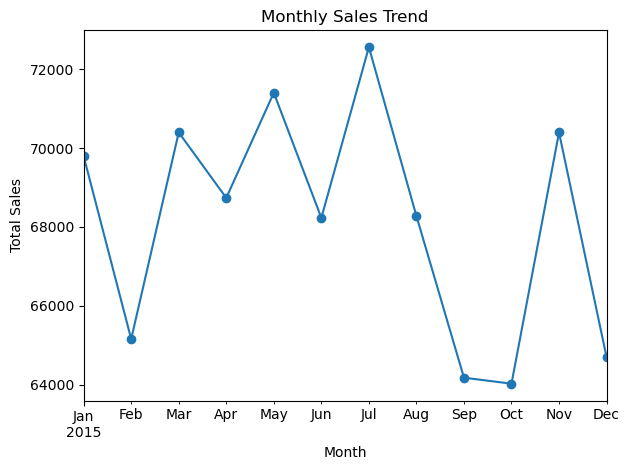

In [15]:


monthly_sales = df.groupby(df['datetime'].dt.to_period('M'))['sales'].sum()
monthly_sales.index = monthly_sales.index.to_timestamp()

plt.figure()
monthly_sales.plot(marker='o', title='Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()


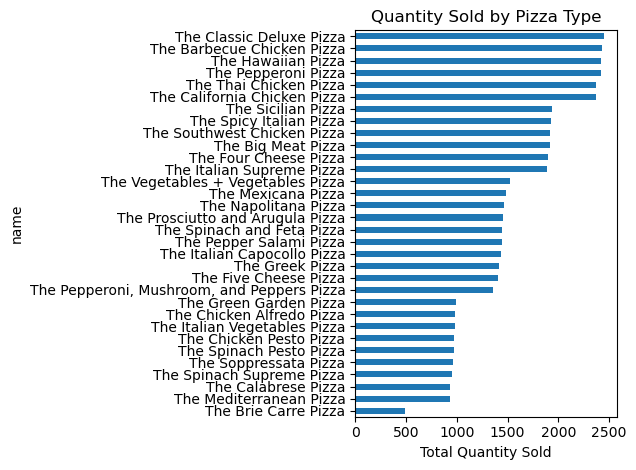

Bottom 5 Under-Performing Pizza Types:
name
The Brie Carre Pizza         490
The Mediterranean Pizza      934
The Calabrese Pizza          937
The Spinach Supreme Pizza    950
The Soppressata Pizza        961


In [16]:


# Step 12: Under-performing pizza types
type_performance = df.groupby('name')['quantity'].sum().sort_values()

plt.figure()
type_performance.plot(kind='barh', title='Quantity Sold by Pizza Type')
plt.xlabel('Total Quantity Sold')
plt.tight_layout()
plt.show()

# Print bottom 5 under-performing pizza types
bottom5 = type_performance.head(5)
print("Bottom 5 Under-Performing Pizza Types:")
print(bottom5.to_string())


Average items per order: 2.32
Average order value: $38.31

Category Performance:
          total_quantity  total_revenue
category                               
Classic            14888      220053.10
Supreme            11987      208197.00
Chicken            11050      195919.50
Veggie             11649      193690.45 



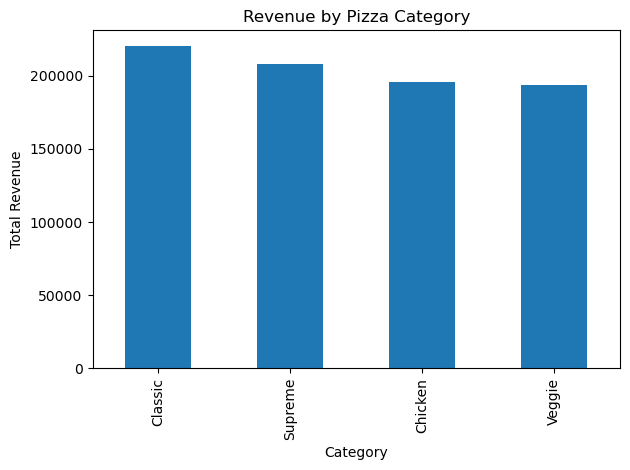

Size Performance:
      total_quantity  total_revenue
size                               
L              18956      375318.70
M              15635      249382.25
S              14403      178076.50
XL               552       14076.00
XXL               28        1006.60 



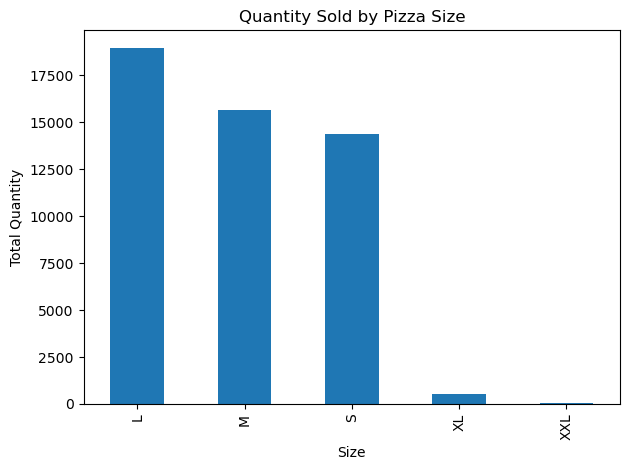

Top 10 Most Common Ingredients:
Garlic: 27422
Tomatoes: 26601
Red Onions: 19547
Red Peppers: 16284
Mozzarella Cheese: 10333
Pepperoni: 10300
Spinach: 10012
Mushrooms: 9624
Chicken: 8443
Capocollo: 6572


In [18]:

from collections import Counter

# 1. Order-level metrics: average items per order & average order value
order_summary = df.groupby('order_id').agg(
    total_items=('quantity', 'sum'),
    order_value=('sales', 'sum')
)
avg_items = order_summary['total_items'].mean()
avg_value = order_summary['order_value'].mean()

print(f"Average items per order: {avg_items:.2f}")
print(f"Average order value: ${avg_value:.2f}\n")

# 2. Performance by pizza category
category_perf = df.groupby('category').agg(
    total_quantity=('quantity', 'sum'),
    total_revenue=('sales', 'sum')
).sort_values('total_revenue', ascending=False)

print("Category Performance:")
print(category_perf, "\n")

plt.figure()
category_perf['total_revenue'].plot(kind='bar')
plt.title('Revenue by Pizza Category')
plt.xlabel('Category')
plt.ylabel('Total Revenue')
plt.tight_layout()
plt.show()

# 3. Breakdown by pizza size
size_perf = df.groupby('size').agg(
    total_quantity=('quantity', 'sum'),
    total_revenue=('sales', 'sum')
).sort_index()

print("Size Performance:")
print(size_perf, "\n")

plt.figure()
size_perf['total_quantity'].plot(kind='bar')
plt.title('Quantity Sold by Pizza Size')
plt.xlabel('Size')
plt.ylabel('Total Quantity')
plt.tight_layout()
plt.show()

# 4. Ingredient frequency analysis
ingredients_series = df['ingredients'].dropna().str.split(', ')
ingredient_counts = Counter(ing for sublist in ingredients_series for ing in sublist)
top_10_ingredients = ingredient_counts.most_common(10)

print("Top 10 Most Common Ingredients:")
for ing, cnt in top_10_ingredients:
    print(f"{ing}: {cnt}")
